# Human metagenomics ML model Data Analysis, Preprocessing and Visualisation

Dataset analysis

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("abundance.csv")
display(df)


C:\Users\satya\AppData\Local\Temp\ipykernel_5556\1908245521.py:4: DtypeWarning: Columns (2,5,9,20,78,79,147,148,149,150,151,152,153,154,155,156,165,166,168) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("abundance.csv")


,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,WT2D,S367,s367,stool,impaired_glucose_tolerance,70.91,nd,yugoslavia,Illumina,23719380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,WT2D,S604,s604,stool,t2d,71.63,nd,yugoslavia,Illumina,23719380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hmp,SRS011061,158458797,stool,n,nd,female,usa,Illumina,22699609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hmp,SRS011084,158479027,stool,n,nd,male,usa,Illumina,22699609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hmp,SRS011086,158458797,tongue_dorsum,n,nd,female,usa,Illumina,22699609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,t2dmeta_long,T2D-034,-,stool,-,-,-,-,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3606,t2dmeta_long,T2D-035,-,stool,-,-,-,-,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3607,t2dmeta_long,T2D-037,-,stool,-,-,-,-,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3608,t2dmeta_long,T2D-038,-,stool,-,-,-,-,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now lets understand the columns in the dataset

In [6]:
print(df.columns)   

Index(['dataset_name', 'sampleID', 'subjectID', 'bodysite', 'disease', 'age',
       'gender', 'country', 'sequencing_technology', 'pubmedid',
       ...
       'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified',
       'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis',
       'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g

In [7]:
df.drop(columns=['dataset_name', 'sampleID', 'subjectID', 'sequencing_technology', 'pubmedid', 'camp', 
                 'paired_end_insert_size', 'read_length', 'total_reads', 'matched_reads', 'uniquely_matching_reads', 
                 'uniquely_matched_reads', 'gene_number', 'gene_number_for_11m_uniquely_matched_reads', 
                 'hitchip_probe_number', 'gene_count_class', 'hitchip_probe_class', '#SampleID', 'rna_sampleid', 
                 'postnatal_antimicrobial_use', 'infant_gestation_weeks', 'cohort', 'less_than_29weeks', 
                 'sample_collection_days', 'gut_sample_id_ncbipublic', 
                 'gut_sample_id_corrected', 'projectid', 'flowcell', 'comment', 'mlst_project', 'mlst_ec', 'st_ec', 
                 'mlst_kp', 'st_kp', 'extractionprotocolid', 'site_id_cincinnati', 'ascites', 'classification'], inplace=True, errors='ignore')


In [8]:
print(df.columns)
display(df)

Index(['bodysite', 'disease', 'age', 'gender', 'country', 'bmi',
       'infant_gender', 'collectionweek', 'samplecollectionwindow',
       'delivery_mode',
       ...
       'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified',
       'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis',
       'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis',
       'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Pe

,bodysite,disease,age,gender,country,bmi,infant_gender,collectionweek,samplecollectionwindow,delivery_mode,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,stool,impaired_glucose_tolerance,70.91,nd,yugoslavia,32.3,nd,nd,nd,nd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,stool,t2d,71.63,nd,yugoslavia,28.9,nd,nd,nd,nd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,stool,n,nd,female,usa,nd,nd,nd,nd,nd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,stool,n,nd,male,usa,nd,nd,nd,nd,nd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tongue_dorsum,n,nd,female,usa,nd,nd,nd,nd,nd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,stool,-,-,-,-,-,nd,nd,nd,nd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3606,stool,-,-,-,-,-,nd,nd,nd,nd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3607,stool,-,-,-,-,-,nd,nd,nd,nd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3608,stool,-,-,-,-,-,nd,nd,nd,nd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now lets take all rows and keep as features apart from the Diseases as that will be our target variable.

In [9]:
Input_Features = [col for col in df.columns if col != 'disease']
print(Input_Features)

['bodysite', 'age', 'gender', 'country', 'bmi', 'infant_gender', 'collectionweek', 'samplecollectionwindow', 'delivery_mode', 'infant_ethnicity', 'infant_race', 'birth_year', 'necrotizing_enterocolitis', 'dol_firstnecors', 'sepsis', 'infant_birthweight_kg', 'infant_birth_length_cm', 'maternal_abx_given', 'postnatal_abx_2window', 'perinatal_antimicrobial_use', 'death', 'nursing_status', 'maternal_age_at_delivery_years', 'mat_age_bin', 'parity', 'infant_fut2', 'mat_fut2', 'lowh', 'lowlea', 'highslea', 'married', 'gravida', 'preeclampsia', 'mult_birth', 'hypertension', 'hypertension_prepreg', 'chorioamnionitis', 'primipar', 'daysonform3daysprior', 'days_on_abx_14', 'visit_number', 'snprnt', 'wmsphase', 'first', 'repeat', 'stooltexture', 'daysafteronset', 'hus', 'stec_count', 'shigatoxin2elisa', 'readsmillions', 'nonhuman', 'stec_coverage', 'stxab_detected', 'stx_ratio', 'typingdata', 'c_difficile_frequency', 'ibd', 'sampling_day', 'known_consumers_of_a_defined_fermented_milk_product_(dfmp

- Label encoding:
this is needed to convert non numeric data into numeric data to make it simpler the model to understand.
- Normalisation:
this is needed to convert the data into a range of 0 to 1 so that the model can understand the data better.
 
>we need to first get non numeric columns 


In [10]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(non_numeric_columns)

['bodysite', 'disease', 'age', 'gender', 'country', 'bmi', 'infant_gender', 'collectionweek', 'samplecollectionwindow', 'delivery_mode', 'infant_ethnicity', 'infant_race', 'birth_year', 'necrotizing_enterocolitis', 'dol_firstnecors', 'sepsis', 'infant_birthweight_kg', 'infant_birth_length_cm', 'maternal_abx_given', 'postnatal_abx_2window', 'perinatal_antimicrobial_use', 'death', 'nursing_status', 'maternal_age_at_delivery_years', 'mat_age_bin', 'parity', 'infant_fut2', 'mat_fut2', 'lowh', 'lowlea', 'highslea', 'married', 'gravida', 'preeclampsia', 'mult_birth', 'hypertension', 'hypertension_prepreg', 'chorioamnionitis', 'primipar', 'daysonform3daysprior', 'days_on_abx_14', 'visit_number', 'snprnt', 'wmsphase', 'first', 'repeat', 'stooltexture', 'daysafteronset', 'hus', 'stec_count', 'shigatoxin2elisa', 'readsmillions', 'nonhuman', 'stec_coverage', 'stxab_detected', 'stx_ratio', 'typingdata', 'c_difficile_frequency', 'ibd', 'sampling_day', 'known_consumers_of_a_defined_fermented_milk_pr

Now lets Label encode the non numeric columns

In [11]:

from sklearn.preprocessing import LabelEncoder


# First, ensure all non-numeric columns contain uniform data types
for column in non_numeric_columns:
    df[column] = df[column].astype(str)

# Now, let's initialize the label encoder
encoder = LabelEncoder()

# Now let's encode all the non-numeric columns
for column in non_numeric_columns:
    df[column] = encoder.fit_transform(df[column])


display(df)

,bodysite,disease,age,gender,country,bmi,infant_gender,collectionweek,samplecollectionwindow,delivery_mode,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,19,6,147,5,18,560,2,3,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,17,178,5,18,495,2,3,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,9,201,2,17,655,2,3,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19,9,201,3,17,655,2,3,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,9,201,2,17,655,2,3,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,19,0,0,0,0,0,2,3,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3606,19,0,0,0,0,0,2,3,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3607,19,0,0,0,0,0,2,3,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3608,19,0,0,0,0,0,2,3,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now lets normalizse the data

In [12]:
from sklearn.preprocessing import MinMaxScaler    
df[Input_Features] = MinMaxScaler().fit_transform(df[Input_Features])
display(df)

,bodysite,disease,age,gender,country,bmi,infant_gender,collectionweek,samplecollectionwindow,delivery_mode,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,0.791667,6,0.731343,1.0,1.000000,0.854962,1.0,0.428571,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.791667,17,0.885572,1.0,1.000000,0.755725,1.0,0.428571,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.791667,9,1.000000,0.4,0.944444,1.000000,1.0,0.428571,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.791667,9,1.000000,0.6,0.944444,1.000000,1.0,0.428571,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.958333,9,1.000000,0.4,0.944444,1.000000,1.0,0.428571,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,0.791667,0,0.000000,0.0,0.000000,0.000000,1.0,0.428571,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3606,0.791667,0,0.000000,0.0,0.000000,0.000000,1.0,0.428571,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3607,0.791667,0,0.000000,0.0,0.000000,0.000000,1.0,0.428571,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3608,0.791667,0,0.000000,0.0,0.000000,0.000000,1.0,0.428571,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Okay now before we move forward lets save this dataframe as a new csv file so that we can use it for other purposes also.

In [13]:
df.to_csv('bet_abundance.csv', index=False)

for our simplicity lets first take a portion of the dataset.
lets take only 1000 rows for now.

In [14]:
random1000 = df.sample(n=1000, random_state=42)  # Randomly sample 1000 rows
random1000.to_csv('lil_data.csv', index=False)  # Save to a new CSV file



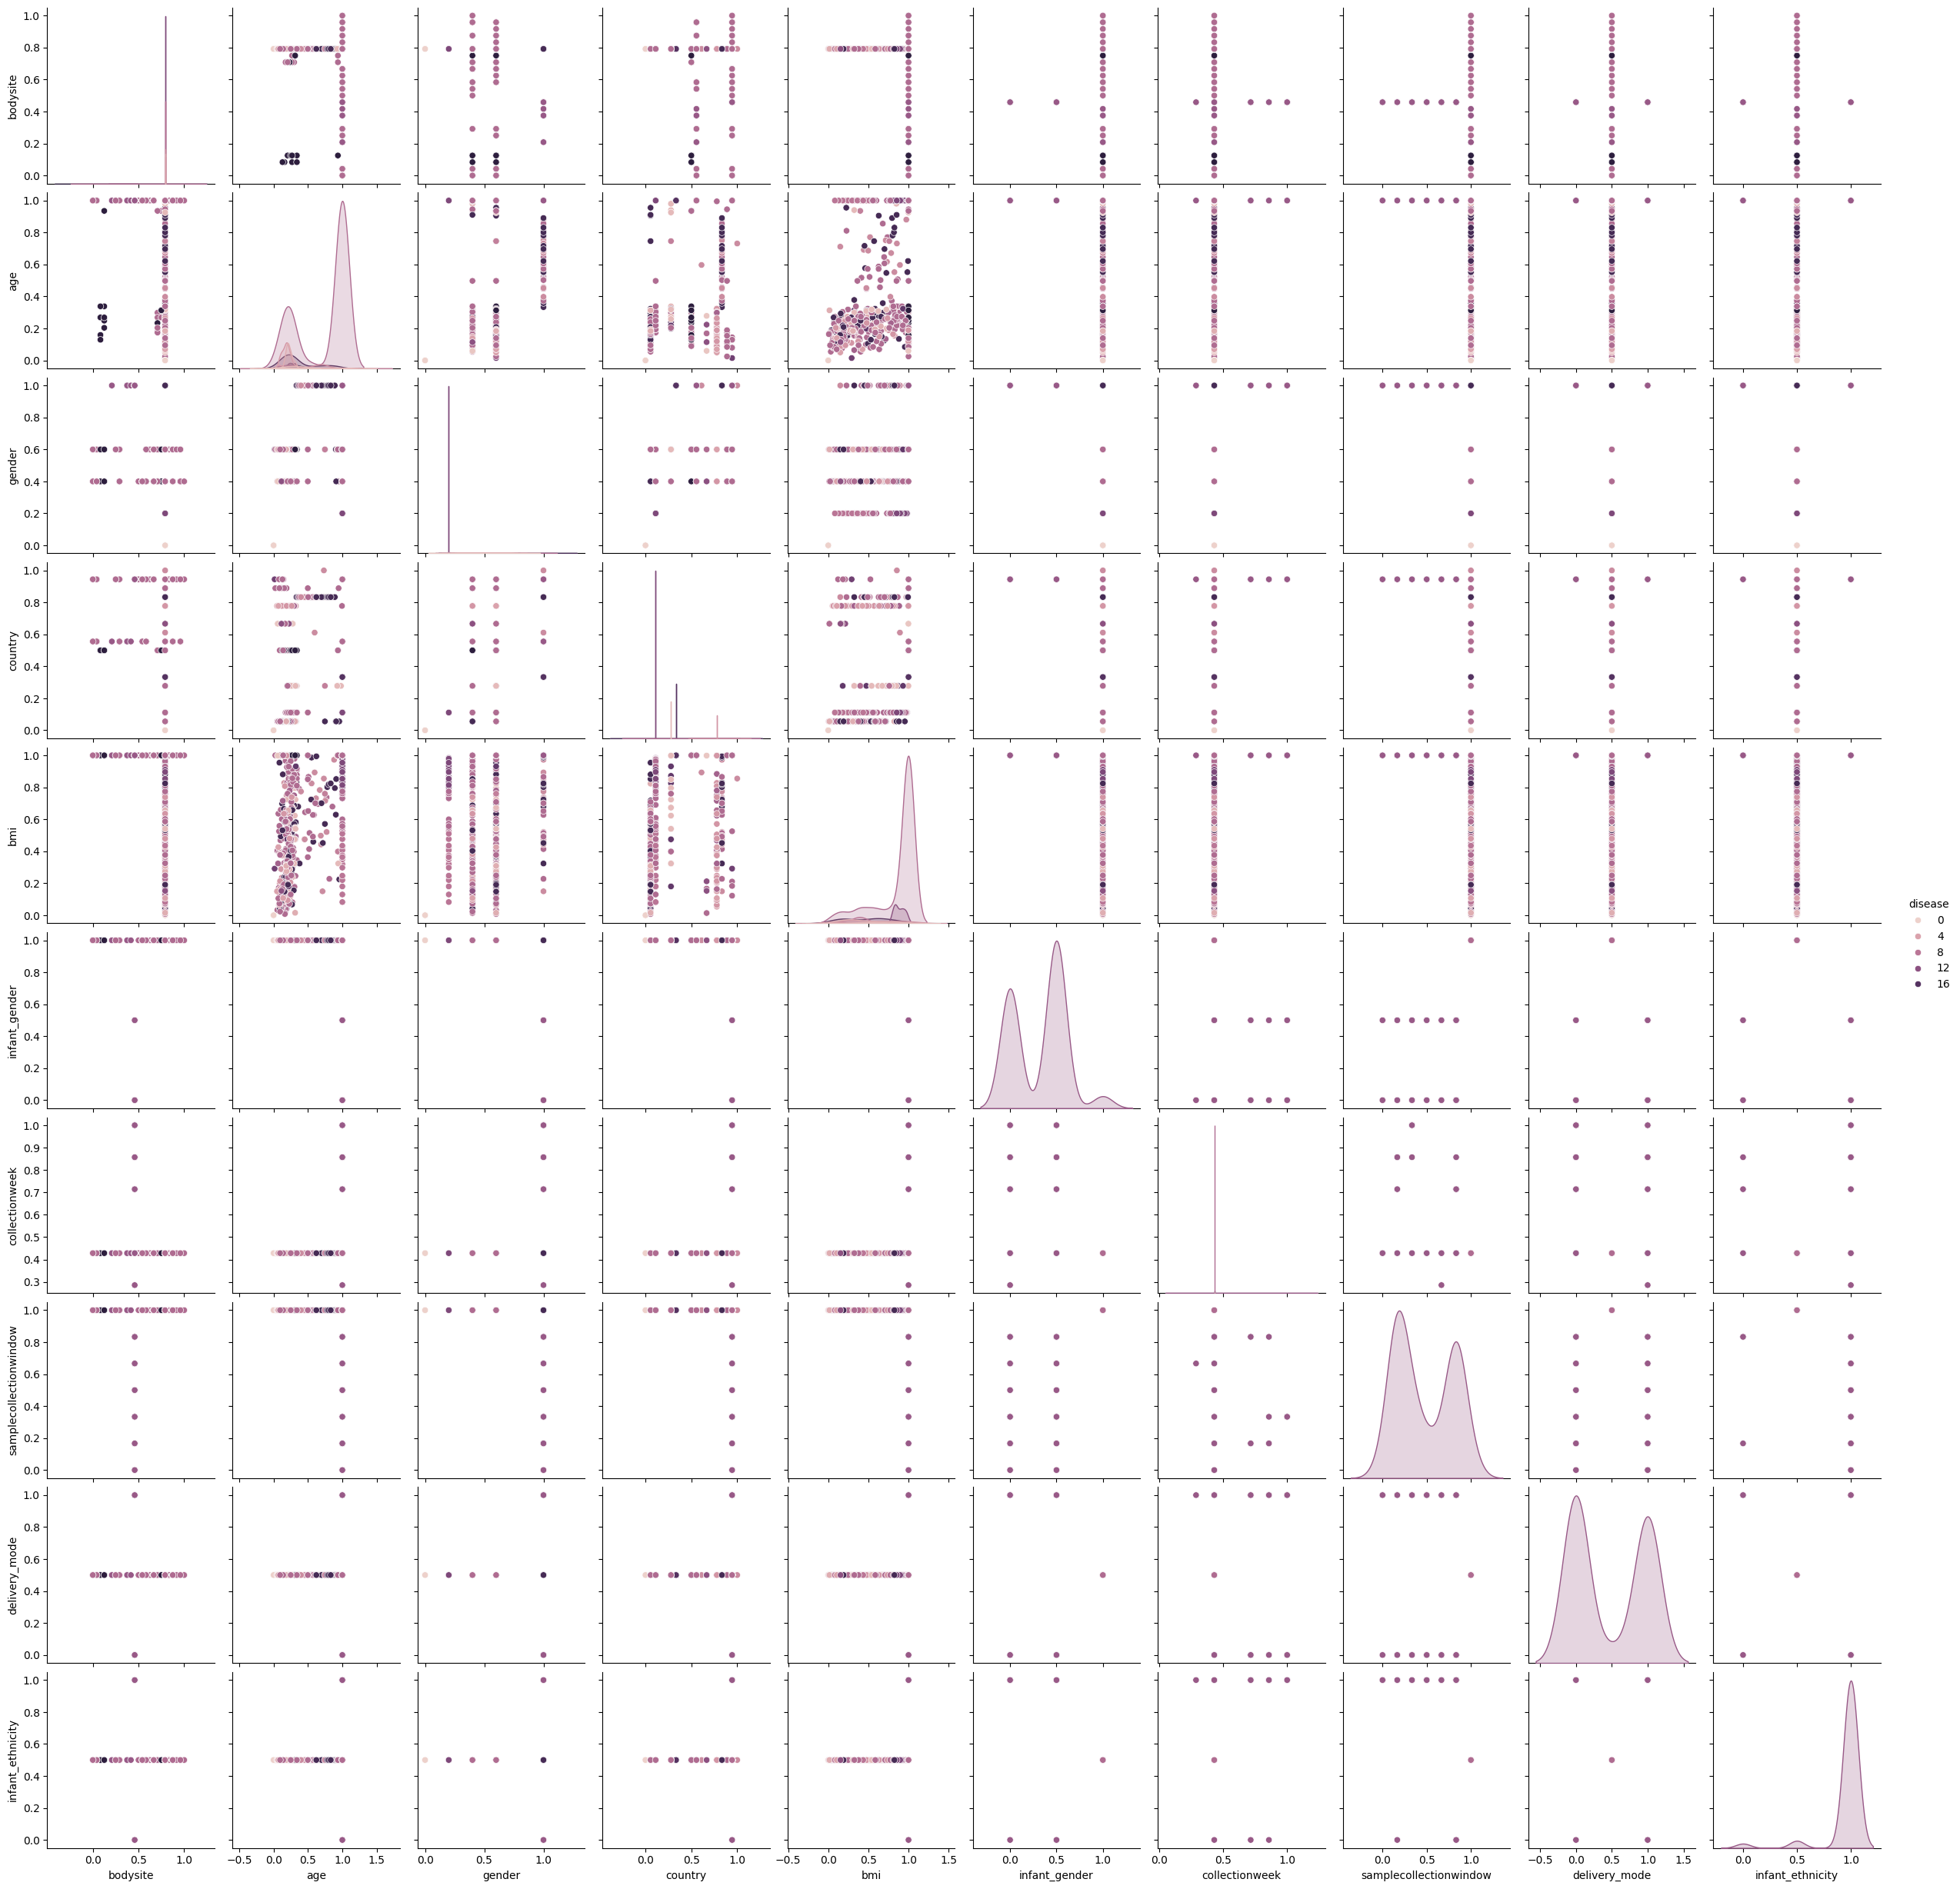

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X and y into a single DataFrame for pairplot
data = random1000.copy()
data['disease'] = y

# Plot pairplot
sns.pairplot(data, hue='disease', vars=Input_Features[:10])  # Limiting to first 10 features for simplicity
plt.show()


It is evident that visualisation/plotting a graph is challenge.


For our understanding and simplicity, we want to first work with a single diseae.
lets take t2d for now. After label encoding, it is 17.
